# Merge Process

---

## 1. Set Environment

In [1]:
import os
from config.secret_keys import OPENAI_API_KEY, USER_AGENT, TAVILY_API_KEY, DART_API_KEY

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY
os.environ['USER_AGENT'] = USER_AGENT
os.environ['DART_API_KEY'] = DART_API_KEY

## 2. Import Modules

In [2]:
from finpilot.memory import LimitedMemorySaver
from finpilot.experimental.workflow import create_application
from finpilot.experimental.vectorstore import create_empty_faiss, add_data_to_vectorstore
from finpilot.experimental.utils import parse_pdf
from finpilot.experimental.test import test_app


from IPython.display import Image, display
from io import BytesIO

## 3. Build Application

### 3-1. Build Vector Store

In [3]:
PDF_PATH = './data/pdf/도메인 특화 LLM Mistral 7B를 활용한 금융 업무분야 파인튜닝 및 활용 방법.pdf'
file_name = '도메인 특화 LLM Mistral 7B를 활용한 금융 업무분야 파인튜닝 및 활용 방법.pdf'

with open(PDF_PATH, 'rb') as file:
    document = parse_pdf(BytesIO(file.read()), file_name)

vector_store = create_empty_faiss()
vector_store = add_data_to_vectorstore(vector_store=vector_store, data=[document])

Processing ...
[                                        ] (0/2[=                                       ] ( 1/2[==                                      ] ( 2/28=[====                                    ] ( 3/28[=====                                   ] ( 4/2=[=======                                 ] ( 5/2[========                                ] ( 6/28=[==========                              ] ( 7/28[===========                             ] ( 8/2[============                            ] ( 9/28=[==============                          ] (10/28[===============                         ] (11/2=[=================                       ] (12/2[==================                      ] (13/28=[====================                    ] (14/28[=====================                   ] (15/2[======================                  ] (16/28=[========================                ] (17/28[=========================               ] (18/2=[===========================             ] (19/2[=======

### 3-2. Create Application

c:\Users\USER\anaconda3\envs\finpilot\lib\site-packages\langsmith\client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


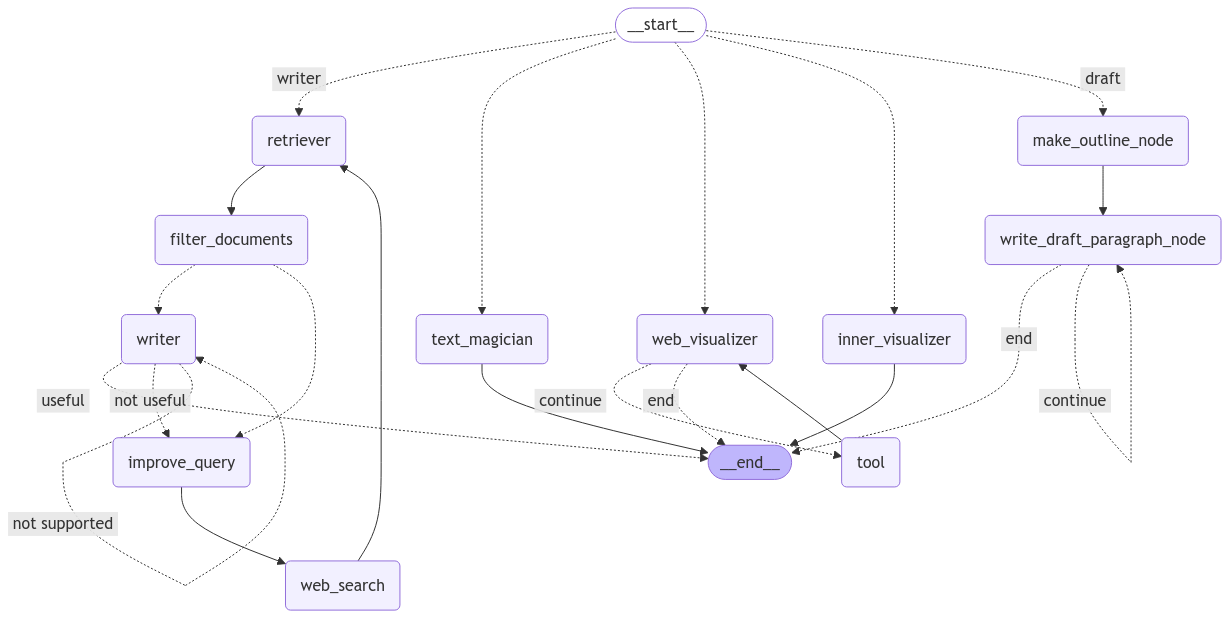

In [4]:
session_id = "session_tmp"
memory = LimitedMemorySaver()

app = create_application(
    memory=memory,
    vector_store=vector_store,
    session_id=session_id
)

display(Image(app.get_graph().draw_mermaid_png()))

## 4. Test

In [5]:
inputs = {
    "question" : "삼성전자 기업 분석 보고서 초안 작성해줘",
    "chat_option" : "초안 생성"
}

config = {
            "configurable" : {"thread_id" : session_id},
            "recursion_limit" : 40,
            "max_tokens": 30000
}

test_app(app, inputs, config)

[Graph Log] ROUTE QUESTION ...
[Graph Log] ROUTE QUESTION to 'draft_writer'
[Graph Log] Created outlines :
['결론 및 제언', '미래 전망', '최근 뉴스 및 이슈', 'SWOT 분석', '경쟁사 분석', '주가 동향', '재무 분석', '산업 현황', '기업 개요']

======================= make_outline_node =======================

State
    'chat_option' : 
        초안 생성
    'question' : 
        삼성전자 기업 분석 보고서 초안 작성해줘
    'messages' : 
        []
    'outlines' : 
        ['결론 및 제언', '미래 전망', '최근 뉴스 및 이슈', 'SWOT 분석', '경쟁사 분석', '주가 동향', '재무 분석', '산업 현황', '기업 개요']


[Graph Log] Current Outline Title : 기업 개요
[Tool Log] stock_code : 005930


> Entering new AgentExecutor chain...


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\n\ndata = {\n    'account_nm': ['자산총계', '유동자산', '미수금', '선급비용', '현금및현금성자산'],\n    'thstrm_amount': [4.85758e+14, 2.17858e+14, 7.72956e+12, 3.76946e+12, 4.98444e+13],\n    'frmtrm_amount': [4.55906e+14, 1.95937e+14, 6.63325e+12, 3.36613e+12, 6.90809e+13]\n}\n\ndf = pd.DataFram